In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

#### Preguntas de negocio
 - .1 Como es la relacion de género y número de transacciones
 - .2 Como es la distribución de edades por número de transacciones"
 - .3 ¿Qué grupo de edad gastó más dinero?
 - .4 Comprobar la distribución por edades entre hombres y mujeres
 - .5 Forma de pago y número de transacciones
 - .6 Relacion entre la cantidad de dinero gastada y el método de pago
 - .7 Investigar qué precios de productos suelen preferir los clientes
 - .8 Descubre las categorías populares
 - .9 Categorías populares por número de transacciones y monto total gastado
 - .10 ¿Cuál es el precio promedio por categoría?
 - .11 Distribución de número de transacciones por grupos de edad y género
 - .12 ¿Cuánto gastó en total cada combinación de género y grupo de edad en diferentes categorías?
 - .13 Los centros comerciales más populares por número de transacciones
 - .14 ¿En qué centro comercial se gasta más dinero?
 - .15 Total gastado por mes entre 2021-2023
 - .16 Conclusiones generales del analisis

In [2]:
df = pd.read_csv('customer_shopping_data.csv')
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


In [4]:
df['invoice_date'] = pd.to_datetime(df['invoice_date'], dayfirst=True)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   invoice_no      99457 non-null  object        
 1   customer_id     99457 non-null  object        
 2   gender          99457 non-null  object        
 3   age             99457 non-null  int64         
 4   category        99457 non-null  object        
 5   quantity        99457 non-null  int64         
 6   price           99457 non-null  float64       
 7   payment_method  99457 non-null  object        
 8   invoice_date    99457 non-null  datetime64[ns]
 9   shopping_mall   99457 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 7.6+ MB


In [6]:
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon


#### .1 Cómo es la relacion de género y número de transacciones

[Text(0.5, 1.0, 'Gender and number of transactions')]

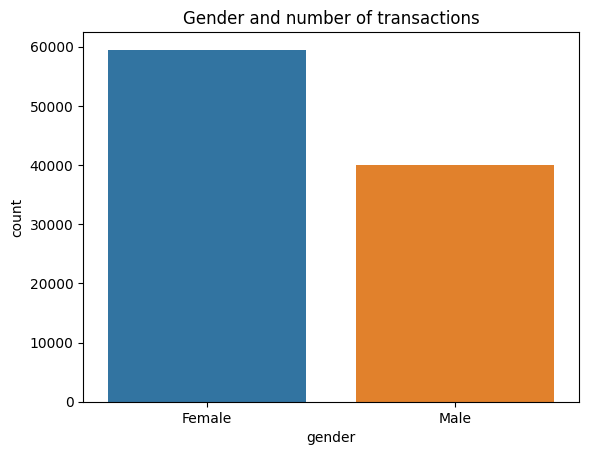

In [7]:
sns.countplot(data=df, x='gender').set(title='Gender and number of transactions')

#### .2 Como es la distribución de edades por número de transacciones"

In [8]:
df1 = df.copy()

In [9]:
df1['age'].describe()

count    99457.000000
mean        43.427089
std         14.990054
min         18.000000
25%         30.000000
50%         43.000000
75%         56.000000
max         69.000000
Name: age, dtype: float64

In [10]:
# new column with age category
df1['age_category'] = df1['age']

In [11]:
df1.head(2)

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,age_category
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon,28
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,21


In [12]:
# funtion to define age category
def age_cat(age):
    if (age >= 18) and (age < 29):
        return '18-28'
    elif (age >= 29) and (age < 39):
        return '29-38'
    elif (age >= 39) and (age < 49):
        return '39-48'
    elif (age >= 59) and (age < 69):
        return '59-68'
    

In [13]:
df1['age_category'] = df1['age_category'].apply(age_cat)

In [14]:
df1.head(3)

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,age_category
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon,18-28
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,18-28
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,Metrocity,18-28


[Text(0.5, 1.0, 'Age distribution and number of transactions')]

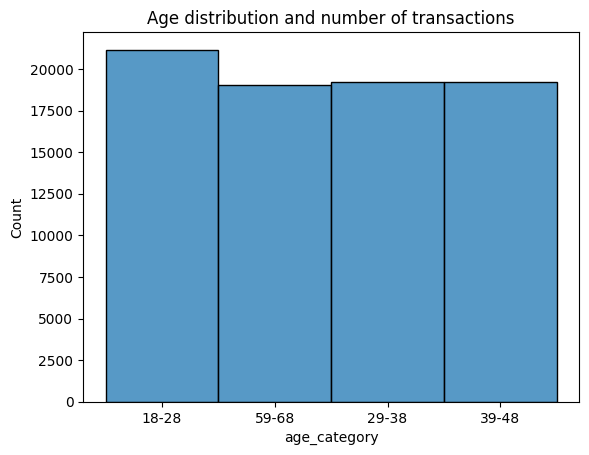

In [15]:
sns.histplot(data=df1, x='age_category').set(title='Age distribution and number of transactions')

In [16]:
df1['total'] = df1['price'] * df1['quantity']

#### .3 ¿Qué grupo de edad gastó más dinero?

[Text(0.5, 1.0, 'Age group and total spent')]

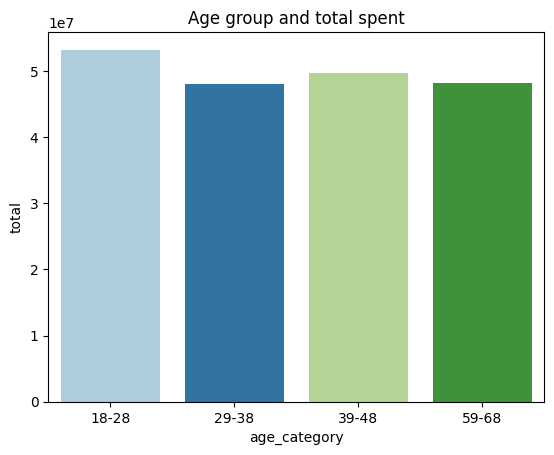

In [17]:
age_group_total = df1.groupby('age_category')['total'].sum().reset_index()
sns.barplot(data=age_group_total, x='age_category', y='total', palette='Paired').set(title='Age group and total spent')

In [42]:
age_group_total

,age_category,total
0,18-28,53211680.65
1,29-38,48036254.87
2,39-48,49680993.67
3,59-68,48245386.91


[Text(0.5, 1.0, 'Age distribution for females and males customers')]

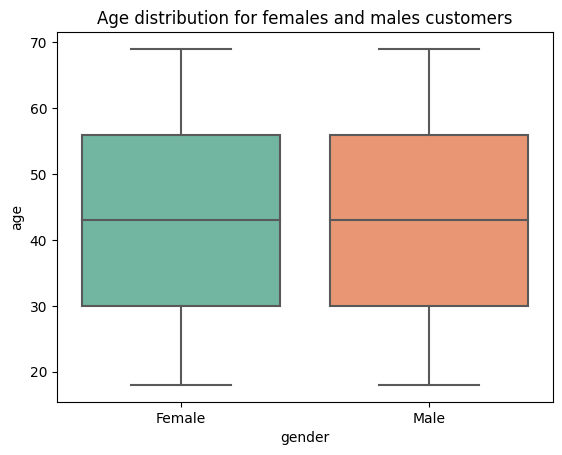

In [18]:
sns.boxplot(data=df1, x='gender', y='age', palette='Set2').set(title='Age distribution for females and males customers')
#plt.title('Age distribution for females and males customers')

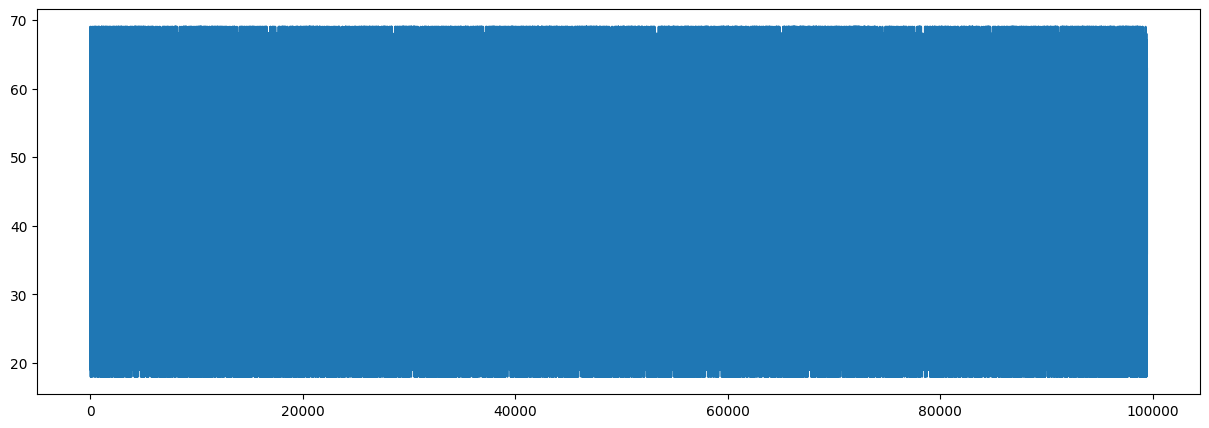

In [41]:
# scatter plot
plt.figure(figsize=(15,5))
df1['age'].plot();

#### - .5 Forma de pago y número de transacciones

In [19]:
df1.head(2)

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,age_category,total
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon,18-28,7502.00
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,18-28,5401.53


In [20]:
# unique customers
df1['customer_id'].describe()

count       99457
unique      99457
top       C241288
freq            1
Name: customer_id, dtype: object

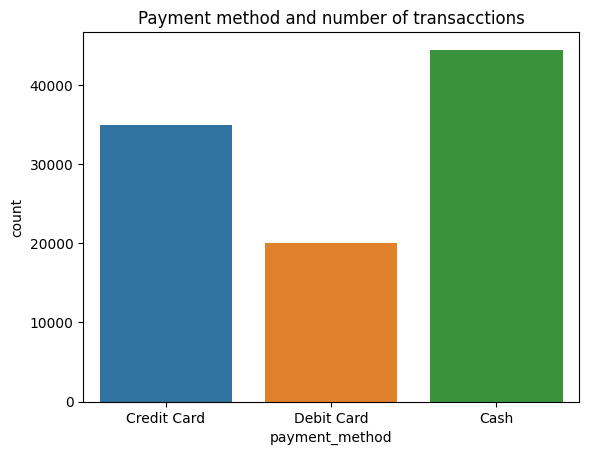

In [47]:
sns.countplot(data=df1, x='payment_method').set(title='Payment method and number of transacctions');

In [45]:
df1['payment_method'].value_counts().reset_index()

,index,payment_method
0,Cash,44447
1,Credit Card,34931
2,Debit Card,20079


####  - .6 Cantidad de dinero gastada por método de pago

In [22]:
df_money = df1.groupby('payment_method')['total'].sum().reset_index()
df_money

,payment_method,total
0,Cash,1.128322e+08
1,Credit Card,8.807712e+07
2,Debit Card,5.059643e+07


[Text(0.5, 1.0, 'money by payment method')]

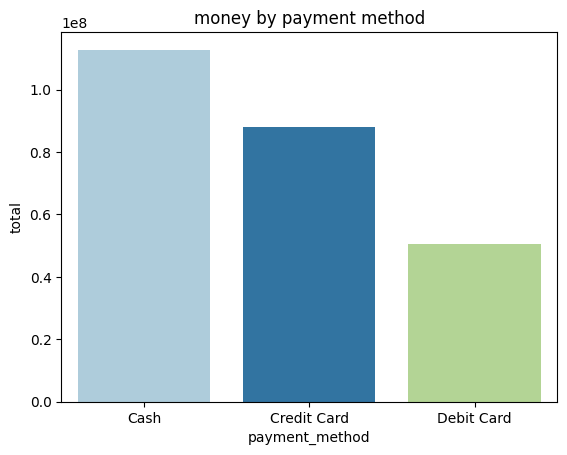

In [23]:
sns.barplot(data=df_money, x='payment_method', y='total', palette='Paired').set(title='money by payment method')
#sns.boxplot(data=df_money, x='payment_method', y='total', palette='Set2').set(title='money by payment method')

#### - .7 Investigar qué precios de productos suelen preferir los clientes

In [24]:
df1.head(2)

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,age_category,total
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon,18-28,7502.00
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,18-28,5401.53


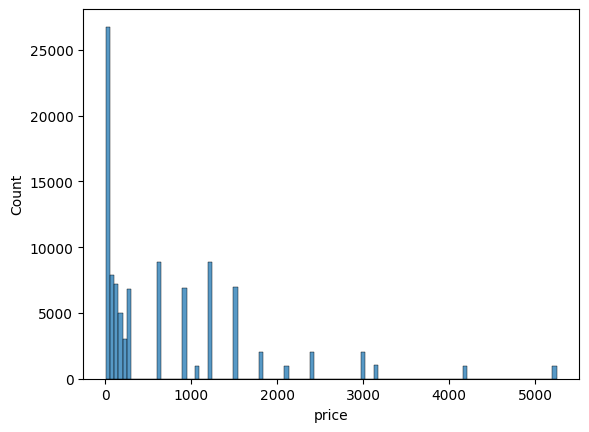

In [46]:
sns.histplot(data=df1, x='price');

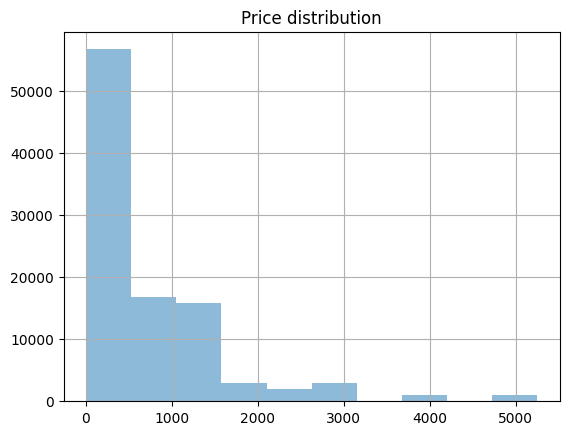

In [26]:
#plt.figure();
df1['price'].hist(alpha=0.5);
plt.title('Price distribution');

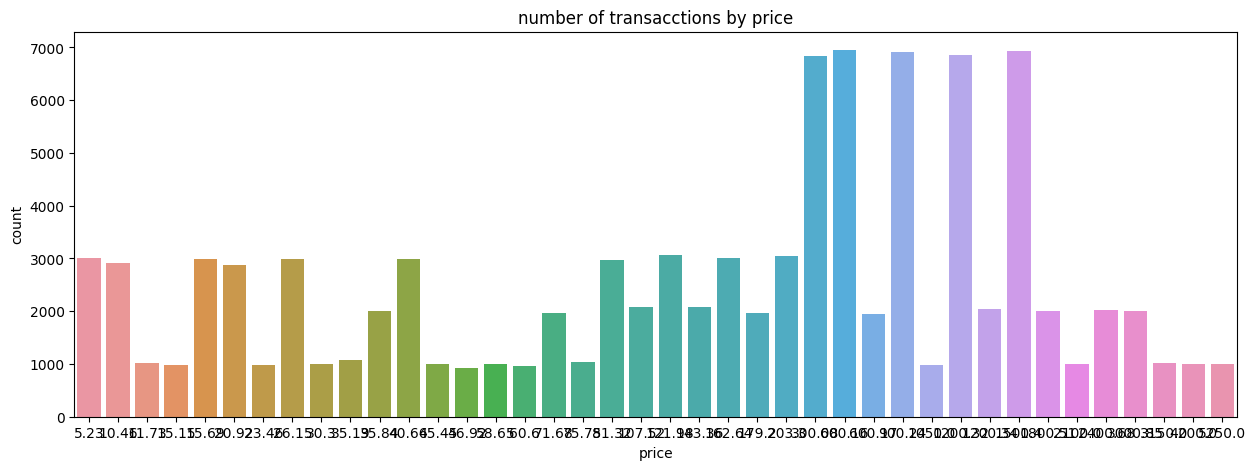

In [49]:
# ejemplo de una grafica que no muestra la informacion requerida
plt.figure(figsize=(15,5))
sns.countplot(data=df1, x='price').set(title='number of transacctions by price');

#### - .8 Descubre las categorías populares

In [27]:
df1.head(2)

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,age_category,total
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon,18-28,7502.00
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,18-28,5401.53


In [28]:
# popular categories 
# step 1: how many categories there area? 
# df1.groupby('category')['invoice_no'].count().reset_index()
df_popular_cat = df1.groupby('category')['invoice_no'].count().reset_index()
df_popular_cat.sort_values(by='invoice_no', ascending=False)


,category,invoice_no
1,Clothing,34487
2,Cosmetics,15097
3,Food & Beverage,14776
7,Toys,10087
4,Shoes,10034
5,Souvenir,4999
6,Technology,4996
0,Books,4981


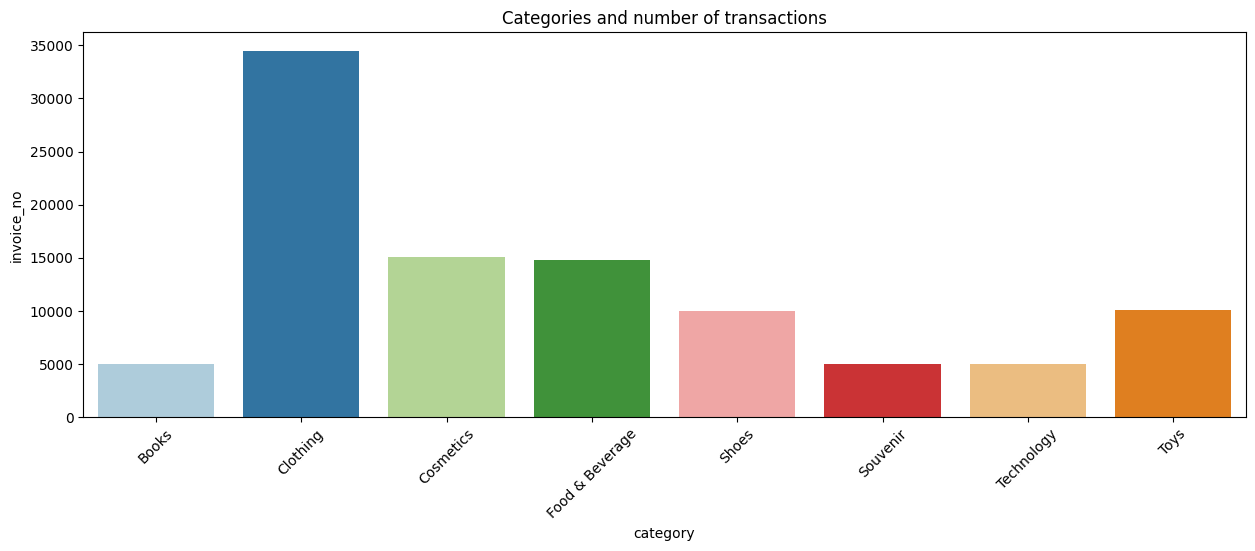

In [50]:
#fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
plt.figure(figsize=(15,5))
sns.barplot( data=df_popular_cat, x='category', y='invoice_no', palette='Paired').set(title='Categories and number of transactions');
plt.xticks(rotation=45);
#sns.barplot( data=df1, x='category', y='total', ax=ax2).set('Categories and total amount spent');
#ax1.tick_params('x', labelrotation=45)
#ax2.tick_params('x', labelrotation=45)


In [30]:
df1.head(2)

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,age_category,total
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon,18-28,7502.00
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,18-28,5401.53


In [31]:
# popular categories 
df_popular_cat_total = df1.groupby('category')['total'].sum().reset_index()
df_popular_cat_total.sort_values(by='total', ascending=False)


,category,total
1,Clothing,1.139968e+08
4,Shoes,6.655345e+07
6,Technology,5.786235e+07
2,Cosmetics,6.792863e+06
7,Toys,3.980426e+06
3,Food & Beverage,8.495351e+05
0,Books,8.345529e+05
5,Souvenir,6.358247e+05


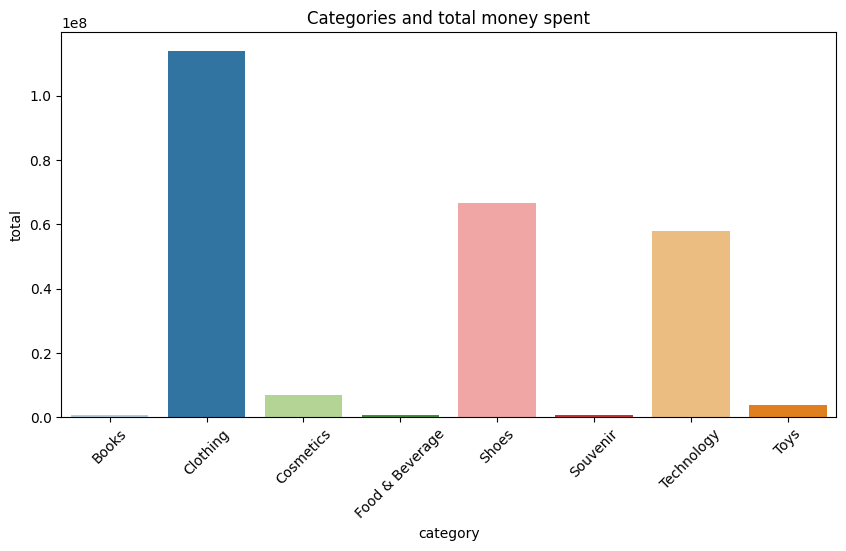

In [32]:
plt.figure(figsize=(10,5))
sns.barplot( data=df_popular_cat_total, x='category', y='total', palette='Paired').set(title='Categories and total money spent');
plt.xticks(rotation=45);


#### .9 Categorías populares por número de transacciones y monto total gastado

In [55]:
df1.groupby('category')['total'].sum().reset_index()



,category,total
0,Books,8.345529e+05
1,Clothing,1.139968e+08
2,Cosmetics,6.792863e+06
3,Food & Beverage,8.495351e+05
4,Shoes,6.655345e+07
5,Souvenir,6.358247e+05
6,Technology,5.786235e+07
7,Toys,3.980426e+06


[Text(0.5, 1.0, 'Categories and total amount spent')]

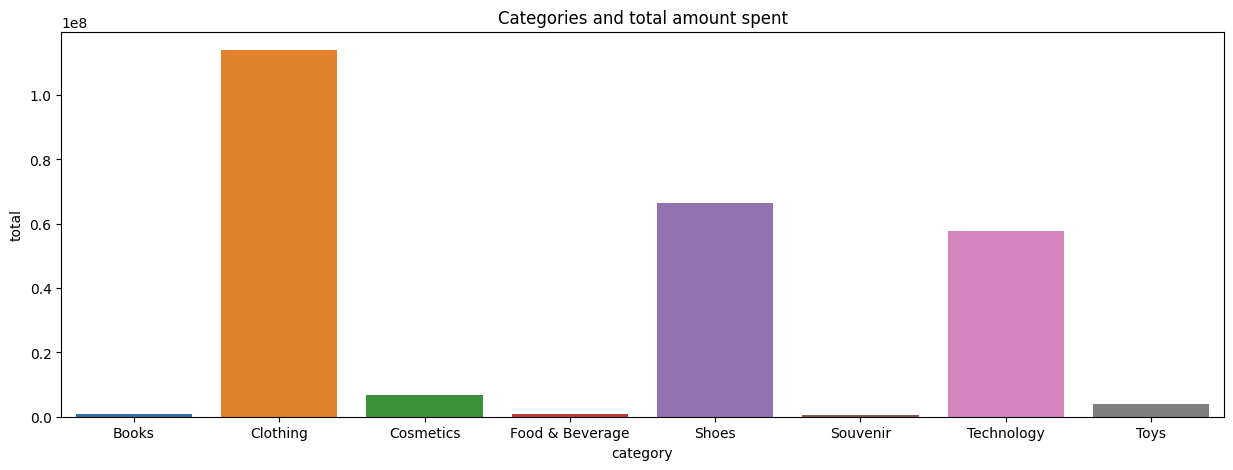

In [58]:
df_total_category = df1.groupby('category')['total'].sum().reset_index()
plt.figure(figsize=(15,5))
sns.barplot(data=df_total_category, x='category', y='total').set(title='Categories and total amount spent')

#### - .10 ¿Cuál es el precio promedio por categoría?

In [33]:
df1.head(2)

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,age_category,total
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon,18-28,7502.00
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,18-28,5401.53


In [34]:
df1.groupby('category')['price'].mean().sort_values(ascending=False).reset_index()

,category,price
0,Technology,3156.935548
1,Shoes,1807.388568
2,Clothing,901.084021
3,Cosmetics,122.448626
4,Toys,107.733185
5,Books,45.568621
6,Souvenir,34.894345
7,Food & Beverage,15.671948


In [51]:
# save the new df
df_price_avg = df1.groupby('category')['price'].mean().sort_values(ascending=False).reset_index()
df_price_avg.head()

,category,price
0,Technology,3156.935548
1,Shoes,1807.388568
2,Clothing,901.084021
3,Cosmetics,122.448626
4,Toys,107.733185


In [52]:
# renombrar la columna price
df_price_avg.rename(
    columns={
        'price': 'price_average',
    },
    inplace=True
)

In [54]:
df_price_avg.head()

,category,price_average
0,Technology,3156.935548
1,Shoes,1807.388568
2,Clothing,901.084021
3,Cosmetics,122.448626
4,Toys,107.733185


### - .11 Distribución de número de transacciones por grupos de edad y género